KNN Regression using Scikit Learn. Given various parameters of the Diamond, we are going to predict the Diamond price using KNN Regressor.

In [63]:
#Import Necessary Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [64]:
#Read the data as pandas Data Frame.
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [65]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,NaN,NaN,NaN,26970.5,15571.281097,1.0,13485.75,26970.5,40455.25,53940.0
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9


In [66]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [67]:
#Check Null Vlaues
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [68]:
#Separate columns with object datatype (categorical)
cols_cat=df.select_dtypes(include='object').columns
print(cols_cat)

Index(['cut', 'color', 'clarity'], dtype='object')


In [69]:
#Check their Unique values for dummy coding/ numeric encoding
for col in cols_cat:
  print('++++'+col+'+++++')
  print(df[col].value_counts())

++++cut+++++
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
++++color+++++
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
++++clarity+++++
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


In [70]:
col_label_en=[ 'cut']

In [71]:
#Label Encode feature 'cut' since it is ordinal
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame, and cols_cat contains the names of categorical columns
for col in col_label_en:
    label_encoder = LabelEncoder()
    df[col + '_encoded'] = label_encoder.fit_transform(df[col])

In [72]:
#Dummy code color and clarity since its nominal
df=pd.get_dummies(df,columns=['color','clarity'],prefix=['color','clarity'])

In [60]:
df.head()

,Unnamed: 0,carat,cut,depth,table,price,x,y,z,cut_encoded,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,Ideal,61.5,55.0,326,3.95,3.98,2.43,2,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,Premium,59.8,61.0,326,3.89,3.84,2.31,3,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,Good,56.9,65.0,327,4.05,4.07,2.31,1,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,Premium,62.4,58.0,334,4.20,4.23,2.63,3,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,Good,63.3,58.0,335,4.34,4.35,2.75,1,...,0,1,0,0,0,1,0,0,0,0


In [73]:
#Drop Unnamed as it is identifier column. Drop 'cut' as its label encoded.
df=df.drop(columns=['Unnamed: 0','cut'],axis=1)

In [74]:
df.head()

,carat,depth,table,price,x,y,z,cut_encoded,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [75]:
#Separate dependent(Price) and independent variables
knn_independent = df.drop(columns=['price'], axis = 1) #"NObeyesdad_encoded",'FAVC_encoded'
knn_dependent = df["price"] #To estimate to Price

In [76]:
#Train test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    knn_independent,
    knn_dependent,
    test_size = 0.20,
    random_state = 42)

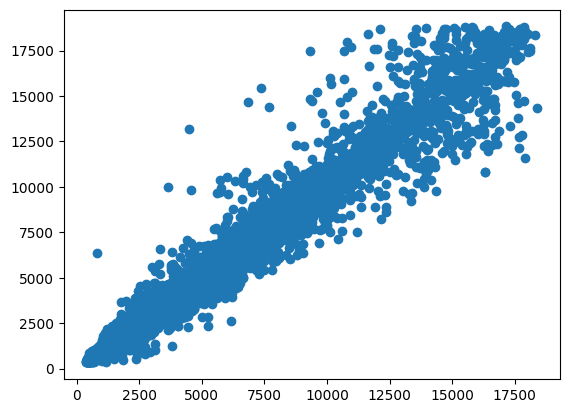

In [77]:
#Use pipeline to scale and then KNN regressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
pipe = Pipeline([
    ("scale", MinMaxScaler(feature_range=(0,1))),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X_train, y_train).predict(X_test)
plt.scatter(pred, y_test)

In [78]:
pred

array([  572.8,  2163.8,  1083.4, ...,  1516.6, 10129.4,  3398.4])

In [79]:
predict_df = pd.DataFrame({"Dependent_Test" : y_test, "Dependent_Predicted" : pred})
predict_df.head()

,Dependent_Test,Dependent_Predicted
1388,559,572.8
50052,2201,2163.8
41645,1238,1083.4
42377,1304,1212.4
17244,6901,9684.2


In [80]:
from sklearn.metrics import r2_score
r2_score(predict_df['Dependent_Test'],predict_df['Dependent_Predicted'])

0.9658652259372925

In [81]:
#Grid search to find the best value of k using k fold(3 fold) cross valodation
from sklearn.model_selection import GridSearchCV
import numpy as np


mod = GridSearchCV(estimator=pipe,
                   param_grid={
                     'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                   },
                   cv=3)
mod.fit(X_train, y_train);

In [82]:
#Cross validation
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024627,0.004299,2.522005,0.386922,1,{'model__n_neighbors': 1},0.945513,0.944830,0.951733,0.947359,0.003106,9
1,0.017552,0.000350,2.068258,0.002964,2,{'model__n_neighbors': 2},0.955373,0.953430,0.959277,0.956026,0.002431,4
2,0.018521,0.000537,2.502557,0.598004,3,{'model__n_neighbors': 3},0.957269,0.953957,0.960785,0.957337,0.002788,2
3,0.017646,0.000136,2.160956,0.123066,4,{'model__n_neighbors': 4},0.957918,0.953645,0.960465,0.957342,0.002814,1
4,0.023095,0.007170,2.431636,0.479942,5,{'model__n_neighbors': 5},0.957952,0.951675,0.959934,0.956520,0.003520,3
5,0.018125,0.000548,2.342651,0.370933,6,{'model__n_neighbors': 6},0.957336,0.949247,0.958170,0.954918,0.004024,5
6,0.020870,0.005081,2.273302,0.255493,7,{'model__n_neighbors': 7},0.955680,0.947424,0.956408,0.953171,0.004074,6
7,0.018056,0.000323,2.451910,0.504346,8,{'model__n_neighbors': 8},0.953526,0.945103,0.954665,0.951098,0.004264,7
8,0.024632,0.010299,2.169714,0.089486,9,{'model__n_neighbors': 9},0.950793,0.943088,0.952311,0.948730,0.004038,8
9,0.025281,0.010182,2.524852,0.511557,10,{'model__n_neighbors': 10},0.948829,0.940906,0.950507,0.946747,0.004187,10


Best Model is when k=4 with mean score of 96.0 for 3 fold cross validation

#Lunr

In [83]:
pip install lunr

In [85]:
import pandas as pd
import json
from lunr import lunr
from lunr.index import Index

# Read a smaller dataset for demonstration purposes
data = {
    'text': ['hello world', 'how are you', 'python programming', 'data analysis'],
    'label': ['greeting', 'question', 'topic', 'task']
}
df = pd.DataFrame(data)

# Assign an index to each row
df = df.assign(idx=lambda d: d.index)

# Display a sample of the dataframe
print(df)

# Convert the dataframe to a list of dictionaries
documents = df.to_dict(orient="records")


                 text     label  idx
0         hello world  greeting    0
1         how are you  question    1
2  python programming     topic    2
3       data analysis      task    3


In [86]:

# Build the lunr index
index = lunr(ref='idx', fields=('text',), documents=documents)

# Search for documents containing the term 'python'
results = index.search('python')

# Retrieve the original documents based on the search results
original_documents = [documents[int(i['ref'])] for i in results]
print(original_documents)



[{'text': 'python programming', 'label': 'topic', 'idx': 2}]


In [87]:
# Serialize the index
serialized_index = index.serialize()



In [88]:
# Save the serialized index to a JSON file
with open('lunr_index.json', 'w') as fd:
    json.dump(serialized_index, fd)

# Load the serialized index from the JSON file
with open("lunr_index.json") as fd:
    loaded_index = json.load(fd)

# Load the index
idx = Index.load(loaded_index)


In [89]:

# Benchmarking comparisons
print("Benchmark Comparisons:")
print("Pandas Query:")
%timeit df.loc[lambda d: d['text'].str.contains("python")]
print("List Comprehension:")
%timeit [d for d in documents if 'python' in d['text']]
print("Lunr Search:")
%timeit idx.search('python')
print("Lunr Search with Retrieval:")
%timeit [documents[int(i['ref'])] for i in idx.search('python')]

Benchmark Comparisons:
Pandas Query:
395 µs ± 32.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
List Comprehension:
609 ns ± 162 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
Lunr Search:
79.1 µs ± 811 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Lunr Search with Retrieval:
94.3 µs ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The benchmarking comparisons provide insights into the performance of different search methods. The results reveal that Lunr search significantly outperforms both Pandas query and list comprehension in terms of speed. This demonstrates the efficiency of Lunr for text-based searching tasks, particularly when coupled with index retrieval for accessing original documents.